In [1]:
import pandas as pd
import numpy as np
import time,os,sys,itertools
from collections import *
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import trimap
from importlib import reload
import metrics
reload(metrics)
from metrics import Metrics
from sklearn.neighbors import NearestNeighbors as knn

In [2]:
#data_1 = pd.read_csv('data/isolet5.data',header = None)
#data_2 = pd.read_csv('data/isolet1+2+3+4.data',header = None)
#data = pd.concat(data_1,data_2, axis = 0)
data = pd.read_csv('data/data.csv',header = None, low_memory = False)
labels = pd.read_csv('data/labels.csv',header = None, low_memory = False)
print("{0} rows, {1} columns".format(data.shape[0],data.shape[1]))

7797 rows, 617 columns


In [3]:
#x,y = data.iloc[:,:-1], data.iloc[:,-1] # getting labels and features
X = np.asarray(data)
Y = np.asarray(labels)
#del x,y,data

In [4]:
print(X.shape,Y.shape)#,x.shape,y.shape)


(7797, 617) (7797, 1)


In [5]:
# Function to draw visualization of distance between embeddings.
def plot_with_labels(low_dim_embs, labels, title = "random"):
	assert low_dim_embs.shape[0] >= len(labels), 'More labels than embeddings'
	plt.figure(figsize=(20,20))  # in inches
	plt.title(str(title))#"perplexity = {0}, n_iterations = {1}".format(perplexity,n_iters))
	for i, label in enumerate(labels):
		x, y = low_dim_embs[i, :]
		plt.scatter(x, y)
		plt.annotate(label,
								 xy=(x, y),
								 xytext=(5, 2),
								 textcoords='offset points',
								 ha='right',
								 va='bottom')
	#plt.title("tsne direct "+str(title))
	#plt.scatter(low_dim_embs[:,0],low_dim_embs[:,1],26,labels)

In [6]:
def drawProgressBar(percent, barLen = 50):
	sys.stdout.write("\r")
	progress = ""
	for i in range(barLen):
		if i<int(barLen * percent):
			progress += "="
		else:
			progress += " "
	sys.stdout.write("[ %s ] %.2f%%" % (progress, percent * 100))
	sys.stdout.flush()

In [7]:
_, nbrs_input = knn(n_neighbors=X.shape[0]).fit(X).kneighbors(X)

#metrics_tsne = Metrics(nbrs_input, Y_tsne)
#metrics_largevis = Metrics(nbrs_input, Y_largevis)
#metrics_trimap = Metrics(nbrs_input, Y_trimap)

In [8]:
def tsne(X, Y,initial_dims=2, max_iter=2000, perplexity=30.0, verbose = True):
    tsne = TSNE(n_components=2, verbose=verbose, perplexity=perplexity, n_iter=max_iter)
    X_embedded = tsne.fit_transform(X)
    #plt.plot()
    return X_embedded

#### BLOCK FOR WALKING THROUGH PERPLEXITIES AND ITERATIONS

In [9]:
perplexities = [20,30,40,50,60]
results_tsne = {}
start = time.time()
counter = 0
for perplexity in perplexities:
    results_tsne[perplexity] = tsne(X,Y,max_iter = 1000,perplexity = perplexity,verbose = False)
    drawProgressBar(int(counter+1)/5)
end = time.time()
print("Time taken:{}".format(end-start))
#plot_with_labels(X_embedded, Y,title = "distances with perplexity = {0}, n_iterations = {1}".format(perplexity,n_iters))

[ ==========                                         ] 20.00%Time taken:1323.4195985794067


##### Take Away  (all results are single run with 1000 iterations):
###### Error with perplexity =  20 : 1.45
###### Error with perplexity =  30 : 1.37
###### Error with perplexity =  40 : 1.33
###### Error with perplexity =  50 : 1.27
###### Error with perplexity =  60 : 1.22

In [10]:
len(results_tsne)

5

In [11]:
#tp_tsne, fp_tsne = metrics_tsne.roc_metrics()
#precision_tsne, recall_tsne = metrics_tsne.mean_precision_recall()
#trust_tsne, cont_tsne = metrics_tsne.trustworthiness_continuity()

metrics_tsne = [Metrics(nbrs_input,results_tsne[i]) for i in results_tsne]

In [12]:
metrics_tsne

In [13]:
t_ = []
t_.append([metrics_tsne[i].roc_metrics() for i in range(5)])

In [14]:
len(t_)

1

In [15]:
prec_tsne = [] #array to store precision, recalls for all tsne results
prec_tsne.append([metrics_tsne[i].mean_precision_recall() for i in range(5)])
tc_tsne = []
tc_tsne.append([metrics_tsne[i].trustworthiness_continuity() for i in range(5)])

In [16]:
def plot_embedding(Y, labels, title):
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(Y[:, 0], Y[:, 1], 20, labels)
    plt.title(title)

In [17]:
len(tc_tsne[0][1])

2

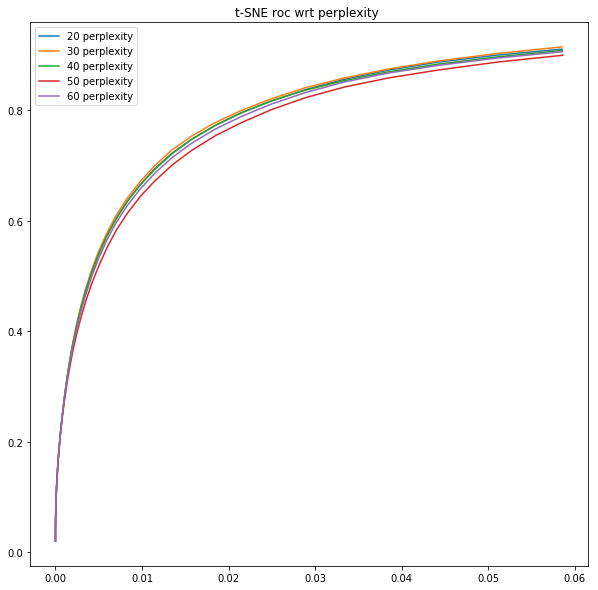

In [18]:
plt.figure(figsize=(10,10))
plt.plot(t_[0][0][1],t_[0][0][0],label = "{0} perplexity".format(perplexities[0]))
plt.plot(t_[0][1][1],t_[0][1][0],label = "{0} perplexity".format(perplexities[1]))
plt.plot(t_[0][2][1],t_[0][2][0],label = "{0} perplexity".format(perplexities[2]))
plt.plot(t_[0][3][1],t_[0][3][0],label = "{0} perplexity".format(perplexities[3]))
plt.plot(t_[0][4][1],t_[0][4][0],label = "{0} perplexity".format(perplexities[4]))
plt.title("t-SNE roc wrt perplexity ")
plt.legend()

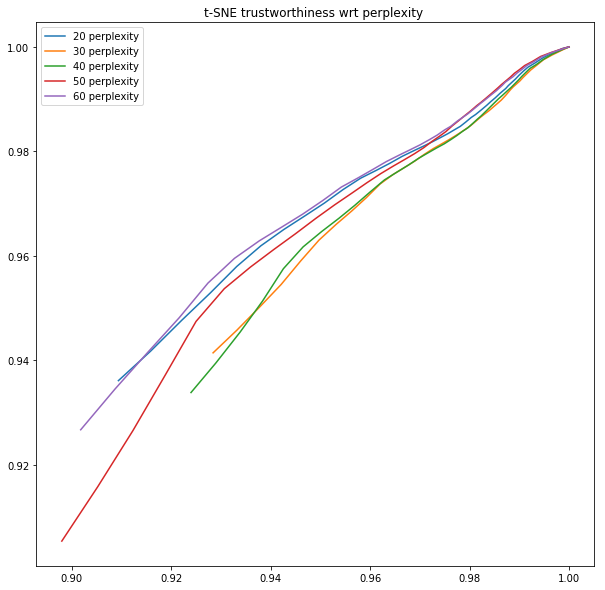

In [19]:
plt.figure(figsize=(10,10))
plt.plot(tc_tsne[0][0][1],tc_tsne[0][0][0],label = "{0} perplexity".format(perplexities[0]))
plt.plot(tc_tsne[0][1][1],tc_tsne[0][1][0],label = "{0} perplexity".format(perplexities[1]))
plt.plot(tc_tsne[0][2][1],tc_tsne[0][2][0],label = "{0} perplexity".format(perplexities[2]))
plt.plot(tc_tsne[0][3][1],tc_tsne[0][3][0],label = "{0} perplexity".format(perplexities[3]))
plt.plot(tc_tsne[0][4][1],tc_tsne[0][4][0],label = "{0} perplexity".format(perplexities[4]))
plt.title("t-SNE trustworthiness wrt perplexity ")
plt.legend()

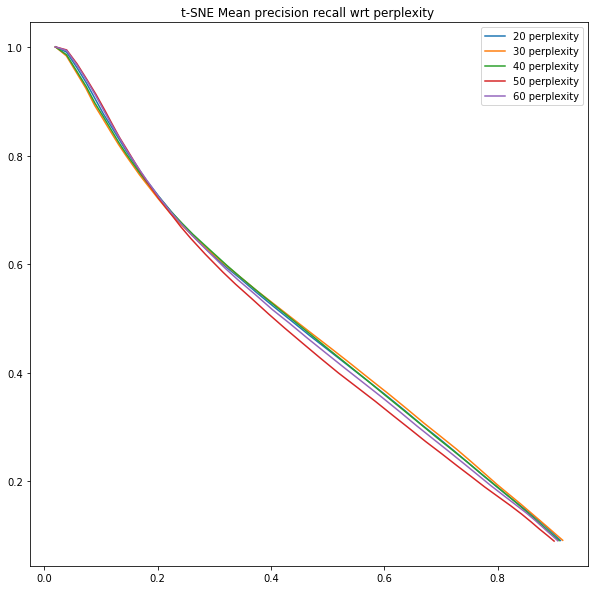

In [20]:
plt.figure(figsize=(10,10))
plt.plot(prec_tsne[0][0][1],prec_tsne[0][0][0],label = "{0} perplexity".format(perplexities[0]))
plt.plot(prec_tsne[0][1][1],prec_tsne[0][1][0],label = "{0} perplexity".format(perplexities[1]))
plt.plot(prec_tsne[0][2][1],prec_tsne[0][2][0],label = "{0} perplexity".format(perplexities[2]))
plt.plot(prec_tsne[0][3][1],prec_tsne[0][3][0],label = "{0} perplexity".format(perplexities[3]))
plt.plot(prec_tsne[0][4][1],prec_tsne[0][4][0],label = "{0} perplexity".format(perplexities[4]))
plt.title("t-SNE Mean precision recall wrt perplexity ")
plt.legend()

In [21]:
results_trimap = {}
start = time.time()
counter = 0
for perplexity in perplexities:
    drawProgressBar(int(counter)/5)
    results_trimap[perplexity] = trimap.embed(X,kin = perplexity)
end = time.time()
print("Time taken:{}".format(end-start))
metrics_trimap = [Metrics(nbrs_input,results_trimap[i]) for i in results_trimap]
roc_trimap = [] #array to store tp,fp for all trimap results
roc_trimap.append([metrics_trimap[i].roc_metrics() for i in range(5)])
prec_trimap = [] #array to store precision, recalls for all trimap results
prec_trimap.append([metrics_trimap[i].mean_precision_recall() for i in range(5)])
tc_trimap = [] #array to store precision, recalls for all trimap results
tc_trimap.append([metrics_trimap[i].trustworthiness_continuity() for i in range(5)])

[                                                    ] 0.00%Time taken:11705.85050201416


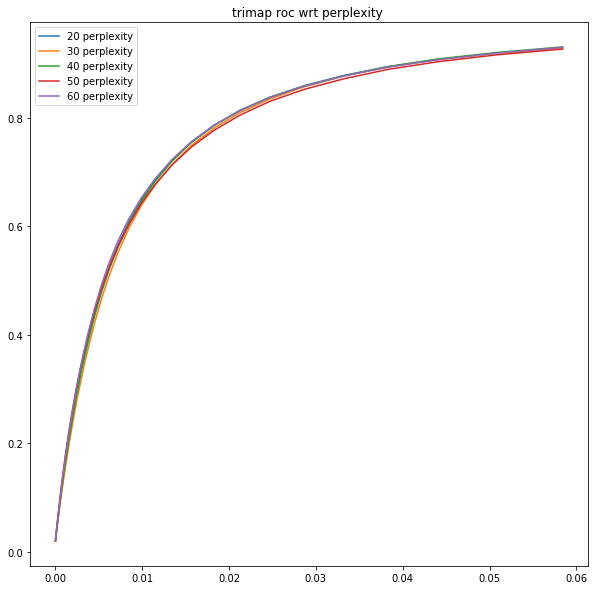

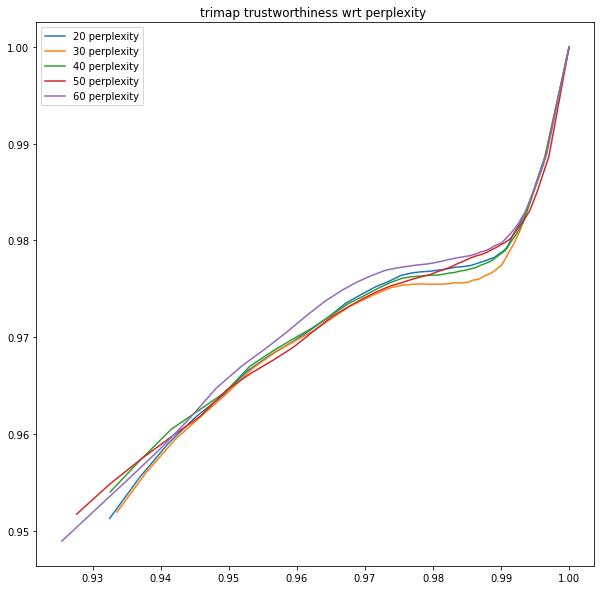

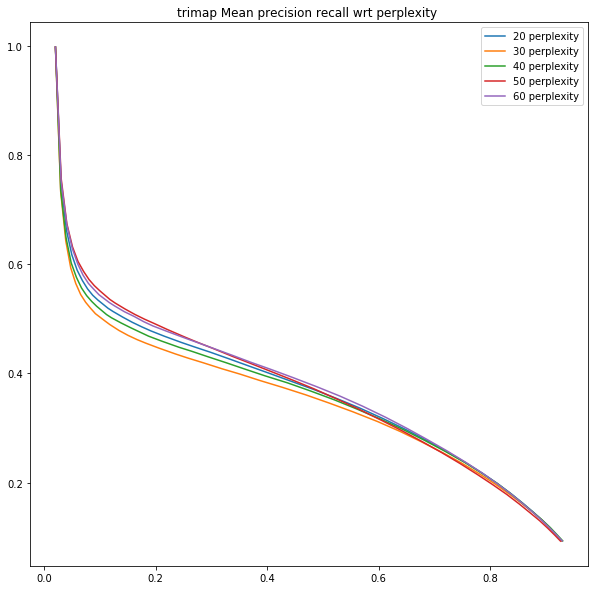

In [22]:
plt.figure(figsize=(10,10))
plt.plot(roc_trimap[0][0][1],roc_trimap[0][0][0],label = "{0} perplexity".format(perplexities[0]))
plt.plot(roc_trimap[0][1][1],roc_trimap[0][1][0],label = "{0} perplexity".format(perplexities[1]))
plt.plot(roc_trimap[0][2][1],roc_trimap[0][2][0],label = "{0} perplexity".format(perplexities[2]))
plt.plot(roc_trimap[0][3][1],roc_trimap[0][3][0],label = "{0} perplexity".format(perplexities[3]))
plt.plot(roc_trimap[0][4][1],roc_trimap[0][4][0],label = "{0} perplexity".format(perplexities[4]))
plt.title("trimap roc wrt perplexity ")
plt.legend()
plt.figure(figsize=(10,10))
plt.plot(tc_trimap[0][0][1],tc_trimap[0][0][0],label = "{0} perplexity".format(perplexities[0]))
plt.plot(tc_trimap[0][1][1],tc_trimap[0][1][0],label = "{0} perplexity".format(perplexities[1]))
plt.plot(tc_trimap[0][2][1],tc_trimap[0][2][0],label = "{0} perplexity".format(perplexities[2]))
plt.plot(tc_trimap[0][3][1],tc_trimap[0][3][0],label = "{0} perplexity".format(perplexities[3]))
plt.plot(tc_trimap[0][4][1],tc_trimap[0][4][0],label = "{0} perplexity".format(perplexities[4]))
plt.title("trimap trustworthiness wrt perplexity ")
plt.legend()
plt.figure(figsize=(10,10))
plt.plot(prec_trimap[0][0][1],prec_trimap[0][0][0],label = "{0} perplexity".format(perplexities[0]))
plt.plot(prec_trimap[0][1][1],prec_trimap[0][1][0],label = "{0} perplexity".format(perplexities[1]))
plt.plot(prec_trimap[0][2][1],prec_trimap[0][2][0],label = "{0} perplexity".format(perplexities[2]))
plt.plot(prec_trimap[0][3][1],prec_trimap[0][3][0],label = "{0} perplexity".format(perplexities[3]))
plt.plot(prec_trimap[0][4][1],prec_trimap[0][4][0],label = "{0} perplexity".format(perplexities[4]))
plt.title("trimap Mean precision recall wrt perplexity ")
plt.legend()

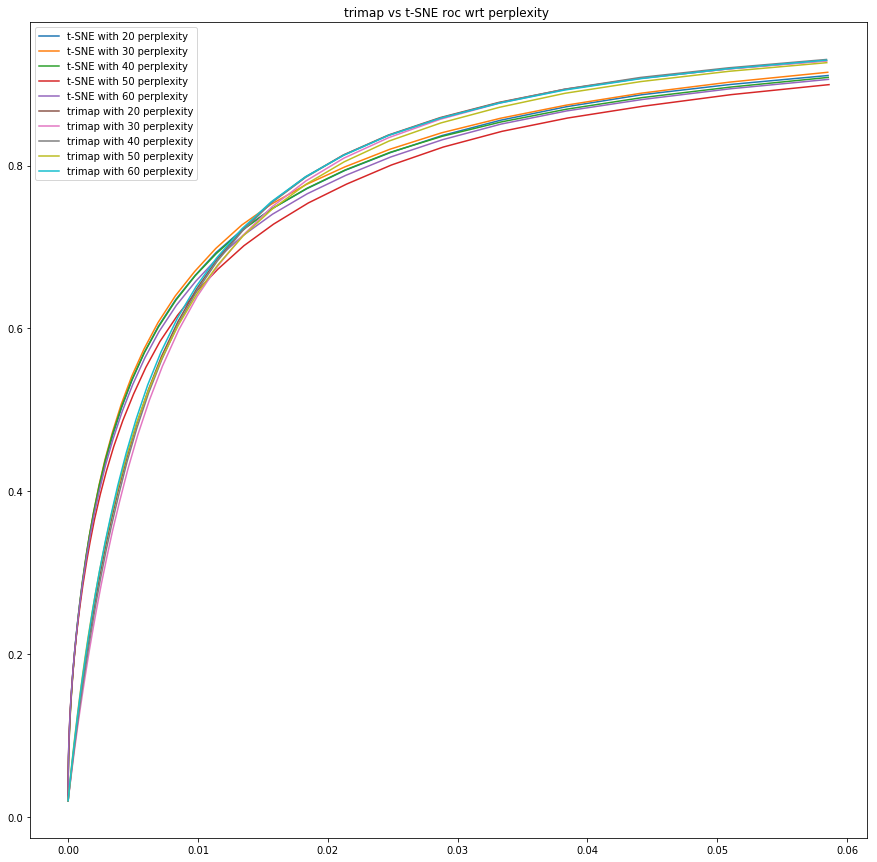

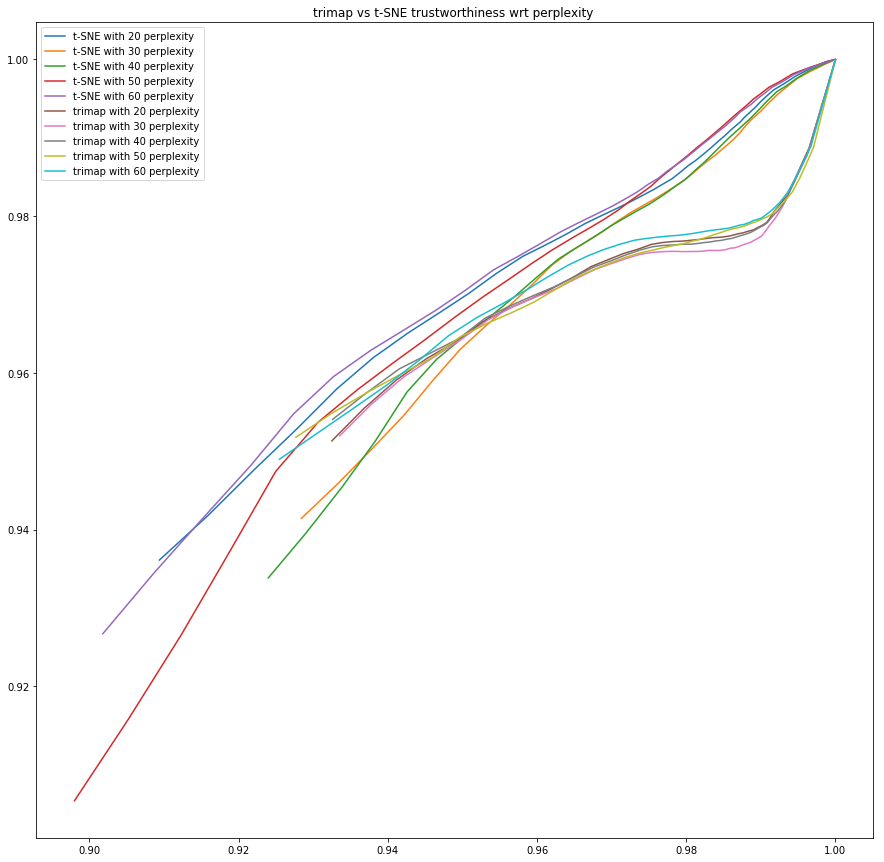

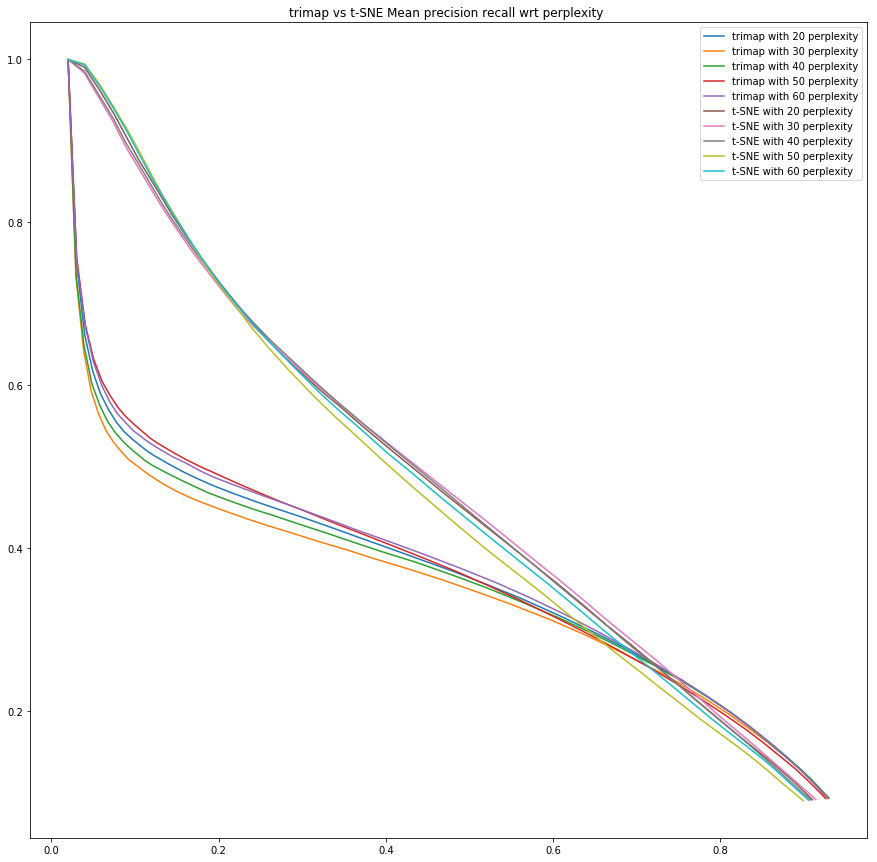

In [24]:
plt.figure(figsize=(15,15))
plt.plot(t_[0][0][1],t_[0][0][0],label = "t-SNE with {0} perplexity".format(perplexities[0]))
plt.plot(t_[0][1][1],t_[0][1][0],label = "t-SNE with {0} perplexity".format(perplexities[1]))
plt.plot(t_[0][2][1],t_[0][2][0],label = "t-SNE with {0} perplexity".format(perplexities[2]))
plt.plot(t_[0][3][1],t_[0][3][0],label = "t-SNE with {0} perplexity".format(perplexities[3]))
plt.plot(t_[0][4][1],t_[0][4][0],label = "t-SNE with {0} perplexity".format(perplexities[4]))
plt.plot(roc_trimap[0][0][1],roc_trimap[0][0][0],label = "trimap with {0} perplexity".format(perplexities[0]))
plt.plot(roc_trimap[0][1][1],roc_trimap[0][1][0],label = "trimap with {0} perplexity".format(perplexities[1]))
plt.plot(roc_trimap[0][2][1],roc_trimap[0][2][0],label = "trimap with {0} perplexity".format(perplexities[2]))
plt.plot(roc_trimap[0][3][1],roc_trimap[0][3][0],label = "trimap with {0} perplexity".format(perplexities[3]))
plt.plot(roc_trimap[0][4][1],roc_trimap[0][4][0],label = "trimap with {0} perplexity".format(perplexities[4]))
plt.title("trimap vs t-SNE roc wrt perplexity ")
plt.legend()

plt.figure(figsize=(15,15))
plt.plot(tc_tsne[0][0][1],tc_tsne[0][0][0],label = "t-SNE with {0} perplexity".format(perplexities[0]))
plt.plot(tc_tsne[0][1][1],tc_tsne[0][1][0],label = "t-SNE with {0} perplexity".format(perplexities[1]))
plt.plot(tc_tsne[0][2][1],tc_tsne[0][2][0],label = "t-SNE with {0} perplexity".format(perplexities[2]))
plt.plot(tc_tsne[0][3][1],tc_tsne[0][3][0],label = "t-SNE with {0} perplexity".format(perplexities[3]))
plt.plot(tc_tsne[0][4][1],tc_tsne[0][4][0],label = "t-SNE with {0} perplexity".format(perplexities[4]))
plt.plot(tc_trimap[0][0][1],tc_trimap[0][0][0],label = "trimap with {0} perplexity".format(perplexities[0]))
plt.plot(tc_trimap[0][1][1],tc_trimap[0][1][0],label = "trimap with {0} perplexity".format(perplexities[1]))
plt.plot(tc_trimap[0][2][1],tc_trimap[0][2][0],label = "trimap with {0} perplexity".format(perplexities[2]))
plt.plot(tc_trimap[0][3][1],tc_trimap[0][3][0],label = "trimap with {0} perplexity".format(perplexities[3]))
plt.plot(tc_trimap[0][4][1],tc_trimap[0][4][0],label = "trimap with {0} perplexity".format(perplexities[4]))
plt.title("trimap vs t-SNE trustworthiness wrt perplexity ")
plt.legend()

# trimap vs tsne precision recall
plt.figure(figsize=(15,15))
plt.plot(prec_trimap[0][0][1],prec_trimap[0][0][0],label = "trimap with {0} perplexity".format(perplexities[0]))
plt.plot(prec_trimap[0][1][1],prec_trimap[0][1][0],label = "trimap with {0} perplexity".format(perplexities[1]))
plt.plot(prec_trimap[0][2][1],prec_trimap[0][2][0],label = "trimap with {0} perplexity".format(perplexities[2]))
plt.plot(prec_trimap[0][3][1],prec_trimap[0][3][0],label = "trimap with {0} perplexity".format(perplexities[3]))
plt.plot(prec_trimap[0][4][1],prec_trimap[0][4][0],label = "trimap with {0} perplexity".format(perplexities[4]))

plt.plot(prec_tsne[0][0][1],prec_tsne[0][0][0],label = "t-SNE with {0} perplexity".format(perplexities[0]))
plt.plot(prec_tsne[0][1][1],prec_tsne[0][1][0],label = "t-SNE with {0} perplexity".format(perplexities[1]))
plt.plot(prec_tsne[0][2][1],prec_tsne[0][2][0],label = "t-SNE with {0} perplexity".format(perplexities[2]))
plt.plot(prec_tsne[0][3][1],prec_tsne[0][3][0],label = "t-SNE with {0} perplexity".format(perplexities[3]))
plt.plot(prec_tsne[0][4][1],prec_tsne[0][4][0],label = "t-SNE with {0} perplexity".format(perplexities[4]))
plt.title("trimap vs t-SNE Mean precision recall wrt perplexity ")
plt.legend()

In [ ]:
del prec_tsne,prec_trimap,t_,tc_trimap